# BIG DATA ANALYSIS: K-Nearest Neighbor
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 샘플 데이터 생성

In [2]:
# 2차원 좌표에 0-5,0-5 사이의 랜덤 포인트 10개 Class0
# 2차원 좌표에 6-20,6-20 사이의 랜덤 포인트 10개 Class1

cls1 = np.vstack((np.random.randint(5, size=10), np.random.randint(5, size=10))).T
cls2 = np.vstack((np.random.randint(6,20, size=10), np.random.randint(6,20, size=10))).T
X = np.append(cls1,cls2,axis=0)
y = np.array([0]*10+[1]*10)

In [3]:
X

array([[ 0,  2],
       [ 2,  4],
       [ 4,  3],
       [ 1,  3],
       [ 1,  1],
       [ 0,  3],
       [ 3,  3],
       [ 2,  1],
       [ 1,  1],
       [ 3,  1],
       [ 9, 13],
       [16, 19],
       [12,  6],
       [ 8,  7],
       [15, 10],
       [19,  8],
       [ 7, 15],
       [10, 17],
       [11, 11],
       [17,  8]])

### 2. 데이터셋 시각화

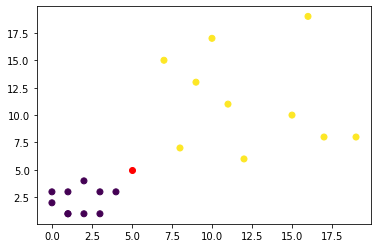

In [4]:

plt.scatter(X[:,0], X[0:,1],  c=y)

#우리가 확인하고자 하는 값 (빨간색으로 표시)
new_point = np.array((5,5))
plt.scatter(new_point[0],new_point[1],  c="red")
plt.show()


## A. KNN 직접 구현

### A-1. 거리측정

In [5]:
# 점과 점사이의 거리를 확인하기 위한 함수
def EuclideanDistance(a,b):
    return np.sqrt(np.sum(np.power(a-b,2)))

In [6]:
#Q new_point와 나머지 점들과의 거리를 계산한후, distances dictionary에 저장하시오
distances = {}
new_point = np.array((10,10))
for index, point in enumerate(X) :
    distances[index] = EuclideanDistance(new_point,point)
distances

{0: 12.806248474865697,
 1: 10.0,
 2: 9.219544457292887,
 3: 11.40175425099138,
 4: 12.727922061357855,
 5: 12.206555615733702,
 6: 9.899494936611665,
 7: 12.041594578792296,
 8: 12.727922061357855,
 9: 11.40175425099138,
 10: 3.1622776601683795,
 11: 10.816653826391969,
 12: 4.47213595499958,
 13: 3.605551275463989,
 14: 5.0,
 15: 9.219544457292887,
 16: 5.830951894845301,
 17: 7.0,
 18: 1.4142135623730951,
 19: 7.280109889280518}

In [7]:
#오름차순으로 정렬
sorted_distance = sorted(distances.items(), key=lambda kv: kv[1])
sorted_distance

[(18, 1.4142135623730951),
 (10, 3.1622776601683795),
 (13, 3.605551275463989),
 (12, 4.47213595499958),
 (14, 5.0),
 (16, 5.830951894845301),
 (17, 7.0),
 (19, 7.280109889280518),
 (2, 9.219544457292887),
 (15, 9.219544457292887),
 (6, 9.899494936611665),
 (1, 10.0),
 (11, 10.816653826391969),
 (3, 11.40175425099138),
 (9, 11.40175425099138),
 (7, 12.041594578792296),
 (5, 12.206555615733702),
 (4, 12.727922061357855),
 (8, 12.727922061357855),
 (0, 12.806248474865697)]

In [8]:
sorted_distance[:3]

[(18, 1.4142135623730951), (10, 3.1622776601683795), (13, 3.605551275463989)]

In [9]:
#Q 상위 K개의 클래스를 기반으로 다수(majority)를 확인한 후 new point의 클래스를 출력하시오!
class0_cnt=0
class1_cnt=0
K=3
for point in sorted_distance[:K]:
    index = point[0]
    if y[index] == 0:
        class0_cnt+=1
    else:
        class1_cnt+=1

if class0_cnt>class1_cnt:
    print("The point is class 0")
else:
    print("The point is class 1")


The point is class 1


In [10]:
#Q 위의 과정을 하나의 함수로 만들기
def KNN(new_point, X, y, K=3):
    distances = {}
    for index, point in enumerate(X) :
        distances[index] = EuclideanDistance(new_point,point)

    sorted_distance = sorted(distances.items(), key=lambda kv: kv[1])
    
    class0_cnt=0
    class1_cnt=0
    for point in sorted_distance[:K]:
        index = point[0]
        if y[index] == 0:
            class0_cnt+=1
        else:
            class1_cnt+=1

    if class0_cnt>class1_cnt:
        print("The point is class 0")
    else:
        print("The point is class 1")


KNN((6,6), X, y, K=3)
KNN((10,20), X, y, K=3)
KNN((5,5), X, y, K=5)

The point is class 0
The point is class 1
The point is class 0


## B. Sklearn 사용하기
[링크](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [11]:
import sys
!{sys.executable} -m pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=b6a6ad375afe53404b2dd8909215a51cd738218e9b60ec05342bcfe2df63a4db
  Stored in directory: /Users/jungwons/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [13]:
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
print(neigh.predict([[5,5]]))

[0]
